# Workshop 6 : Pearson correlation coefficient

### Importing Libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd

### Defining The Model

In [17]:
data = pd.read_csv('tvmarketing.csv')

# Extracting data
X = data['TV'].values
y = data['Sales'].values




In [21]:
with pm.Model() as model:
    rho = pm.Uniform('rho', lower=-1, upper=1)
    sigma_x = pm.HalfNormal('sigma_x', sd=1)
    sigma_y = pm.HalfNormal('sigma_y', sd=1)

    cov_matrix = pm.math.stack(([sigma_x**2, rho * sigma_x * sigma_y],
                               [rho * sigma_x * sigma_y, sigma_y**2]))

    bivariate_normal = pm.MvNormal('bivariate_normal', mu=[0, 0], cov=cov_matrix, observed=np.vstack((X, y)).T)

    trace = pm.sample(2000, tune=2000, cores=8)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sigma_y, sigma_x, rho]


Sampling 8 chains for 2_000 tune and 2_000 draw iterations (16_000 + 16_000 draws total) took 71 seconds.


### Plotting and Visualising The Data

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rho       0.652  0.020   0.614    0.689      0.000    0.000    8543.0   
sigma_x  47.974  0.495  47.059   48.887      0.005    0.003   10731.0   
sigma_y   6.072  0.174   5.743    6.399      0.002    0.001    8650.0   

         ess_tail  r_hat  
rho        8925.0    1.0  
sigma_x   10016.0    1.0  
sigma_y    8873.0    1.0  


d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


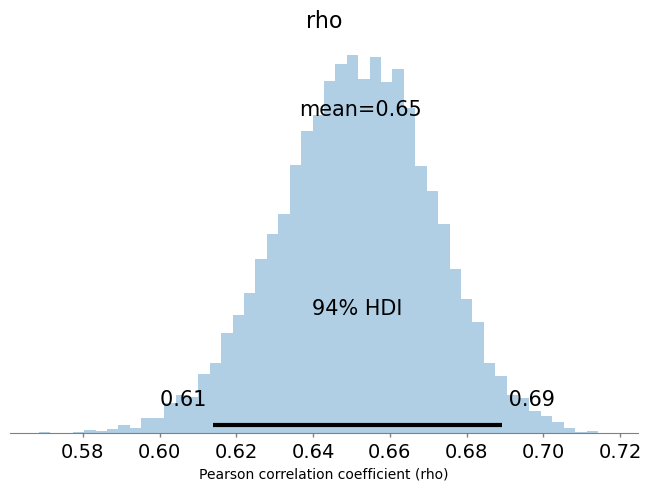

In [26]:
summary=pm.summary(trace)
print(summary)
pm.plot_posterior(trace,var_names=['rho'], kind='hist',bins=50)
plt.xlabel('Pearson correlation coefficient (rho)')
plt.show()